# K-Nearest Neighbors: The Power of Proximity

### What is it?
K-nearest neighbors is a supervised classification algorithm that operates on the principle of proximity. It classifies a new data point based on the majority class of its k-nearest neighbors in the feature space. The value of $k$ represents the number of neighbors considered during the classification process. This approach relies on the assumption that similar data points tend to share the same class. While not as common, KNN can also be used for regression.

### How does it work?
<img src="../images/kmeans-example.webp" width="550" />

The algorithm is pretty simple:
1. **Store Labeled Data:** The "training" data is our set of labeled instances. "Training" is in quotation marks because this isn't really training as much as memorizing.
2. **Classify New Data:** Next, we will classify each new instance in the testing set. The classification of the new instance is determined by a majority vote among the classes of its k nearest neighbors

### Choosing k
There are a few things to keep in mind when choosing the value of $k$:
- If the number of classes is even, it is recommended to use an odd value for $k$ to avoid ties in voting
- A common rule of thumb for $k$ is the square root of the number of data points
- We can always tune the value of $k$ with cross-validation like any other hyperparameter (this is what we do below)

## Demo: Penguins!
<img src="../images/adventuretime-penguins.gif" width="550" />

<span style="font-size: 20px; font-weight: bold;">Goal:</span> Classify the species of the penguins by the size of their bills

In [7]:
# Imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

Let's take a quick look at the data. For the sake of this demo, we will only be looking at the size of their bills.

In [2]:
data = load_penguins()
data = data.dropna()
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


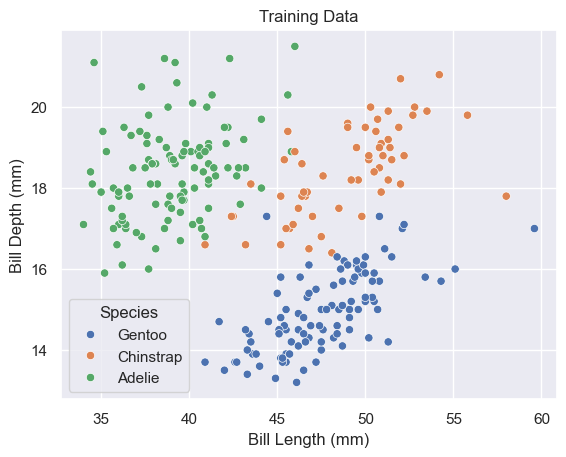

In [3]:
# Prepare data
X = data[['bill_length_mm', 'bill_depth_mm']]
y = data['species']
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Plot training data
sns.set_theme()
sns.scatterplot(data=X_train, x='bill_length_mm', y='bill_depth_mm', hue=y_train)
plt.title('Training Data')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
legend = plt.legend()
legend.set_title('Species')
plt.show()

In [10]:
# Use cross-validation to tune number of neighbors
clf = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 20)}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Find optimal k
best_k = grid_search.best_params_['n_neighbors']
print('Optimal value of k =', best_k)

# Re-train the model with the optimal k
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train, y_train)

# Evaluate on testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Optimal value of k = 4
Accuracy: 0.9850746268656716
